In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
print(os.listdir("../input"))

['earthquake-database']


In [3]:
data = pd.read_csv("../input/earthquake-database/database.csv")
data.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [4]:
data.head() 

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [5]:
data.columns

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status'],
      dtype='object')

In [7]:
# The main features from earthquake data creating a object namely, Date, Time, Latitude, Longitude, Depth, Magnitude
data = data[['Date', 'Time', 'Latitude', 'Longitude', 'Depth', 'Magnitude']]
data.head()


,Date,Time,Latitude,Longitude,Depth,Magnitude
0,01/02/1965,13:44:18,19.246,145.616,131.6,6.0
1,01/04/1965,11:29:49,1.863,127.352,80.0,5.8
2,01/05/1965,18:05:58,-20.579,-173.972,20.0,6.2
3,01/08/1965,18:49:43,-59.076,-23.557,15.0,5.8
4,01/09/1965,13:32:50,11.938,126.427,15.0,5.8


In [8]:
data.describe()

,Latitude,Longitude,Depth,Magnitude
count,23412.000000,23412.000000,23412.000000,23412.000000
mean,1.679033,39.639961,70.767911,5.882531
std,30.113183,125.511959,122.651898,0.423066
min,-77.080000,-179.997000,-1.100000,5.500000
25%,-18.653000,-76.349750,14.522500,5.600000
50%,-3.568500,103.982000,33.000000,5.700000
75%,26.190750,145.026250,54.000000,6.000000
max,86.005000,179.998000,700.000000,9.100000


In [11]:
#Here, the data is random we need to scale according to inputs to the model. So, we convert given Date and Time to Unix time which is in seconds and a numeral. This can be easily used as input for the network we built
import datetime
import time
# Create a list to store Unix timestamps
timestamp = []
# Iterate through the "Date" and "Time" columns
for d, t in zip(data['Date'], data['Time']):
 try:
   ts = datetime.datetime.strptime(d + ' ' + t, '%m/%d/%Y %H:%M:%S')
   timestamp.append(time.mktime(ts.timetuple()))
 except ValueError:
   timestamp.append('ValueError')
# Create a Pandas Series from the timestamp list
timeStamp = pd.Series(timestamp)
# Add the "Timestamp" column to the DataFrame
data['Timestamp'] = timeStamp.values
# Drop the "Date" and "Time" columns
final_data = data.drop(['Date', 'Time'], axis=1)
# Remove rows with 'ValueError' in the "Timestamp" column
final_data = final_data[final_data['Timestamp'] != 'ValueError']
# Display the first few rows of the final dataset
final_data.head()

,Latitude,Longitude,Depth,Magnitude,Timestamp
0,19.246,145.616,131.6,6.0,-157630542.0
1,1.863,127.352,80.0,5.8,-157465811.0
2,-20.579,-173.972,20.0,6.2,-157355642.0
3,-59.076,-23.557,15.0,5.8,-157093817.0
4,11.938,126.427,15.0,5.8,-157026430.0


#                       **AI_PHASE 4 DEVELOPMENT PART 2**

# **VISUALIZATION**

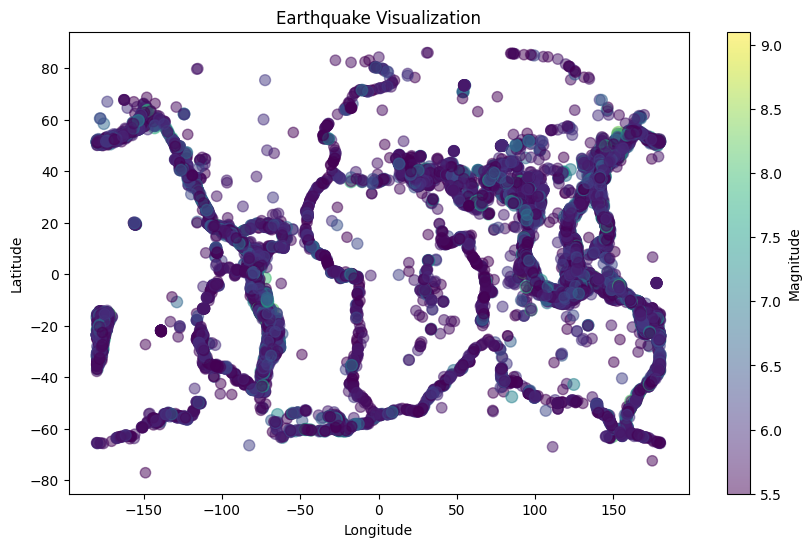

In [12]:
# Extract latitude, longitude, and magnitude columns
latitude = data['Latitude']
longitude = data['Longitude']
magnitude = data['Magnitude']

# Create a scatter plot to visualize earthquakes on a map
plt.figure(figsize=(10, 6))
plt.scatter(longitude, latitude, c=magnitude, cmap='viridis', s=magnitude * 10, alpha=0.5)
plt.colorbar(label='Magnitude')
plt.title('Earthquake Visualization')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()


# **FEATURE ENGINEERING**

In [18]:
import numpy as np
import pandas as pd

# Synthetic seismic data (replace this with your real data)
data = pd.DataFrame({
    'time': np.arange(0, 100, 0.1),
    'acceleration': np.random.rand(1000),
    # Add more columns for other sensor data if available
})

In [18]:
# Define functions for feature engineering
def basic_statistics(data):
    # Calculate basic statistical features
    features = {
        'mean': data['acceleration'].mean(),
        'std_dev': data['acceleration'].std(),
        'min': data['acceleration'].min(),
        'max': data['acceleration'].max(),
    }
    return features

def time_domain_features(data):
    # Calculate time domain features
    # For example, root mean square (RMS) amplitude
    rms = np.sqrt(np.mean(data['acceleration']**2))
    return {'RMS_amplitude': rms}

def frequency_domain_features(data):
    # Calculate frequency domain features using Fourier transform
    fft_result = np.fft.fft(data['acceleration'])
    # Extract amplitude and frequency information
    amplitude = np.abs(fft_result)
    frequency = np.fft.fftfreq(len(fft_result))
    # Find the dominant frequency component
    dominant_frequency = frequency[np.argmax(amplitude)]
    return {'dominant_frequency': dominant_frequency}

In [18]:
# Apply feature engineering functions to your data
statistical_features = basic_statistics(data)
time_domain_features = time_domain_features(data)
frequency_domain_features = frequency_domain_features(data)

# Combining all features into a single feature vector
feature_vector = {**statistical_features, **time_domain_features, **frequency_domain_features}

# Your feature vector is now ready for use in training your earthquake prediction model
print(feature_vector)

{'mean': 0.49091531383038467, 'std_dev': 0.29075881380742785, 'min': 0.0022394487264352225, 'max': 0.9981075829134071, 'RMS_amplitude': 0.5704857513313376, 'dominant_frequency': 0.0}


# **MODEL TRAINING**

In [22]:
X = final_data[['Timestamp', 'Latitude', 'Longitude']]
y = final_data[['Magnitude', 'Depth']]

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a Random Forest regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Training the model on the training data
model.fit(X_train, y_train)

# Making predictions on the test data
y_pred = model.predict(X_test)

# Evaluating the model's performance (for regression tasks)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 968.4488974862994


In [29]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, X_test.shape)

(18727, 3) (4682, 3) (18727, 2) (4682, 3)


In [31]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(random_state=42)
reg.fit(X_train, y_train)
reg.predict(X_test)

array([[  5.865,  42.024],
       [  5.826,  33.09 ],
       [  6.082,  39.741],
       ...,
       [  6.306,  23.059],
       [  5.96 , 592.283],
       [  5.808,  38.222]])

In [32]:
reg.score(X_test, y_test)

0.3926671400442392

In [40]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':[10, 20, 50, 100, 200, 500]}

grid_obj = GridSearchCV(reg, parameters)
grid_fit = grid_obj.fit(X_train, y_train)
best_fit = grid_fit.best_estimator_
best_fit.predict(X_test)

array([[  5.8832 ,  43.7688 ],
       [  5.8156 ,  31.30916],
       [  6.0326 ,  39.223  ],
       ...,
       [  6.31   ,  22.8576 ],
       [  5.9078 , 591.3356 ],
       [  5.7916 ,  39.1958 ]])

# **NEURAL NETWORK MODEL**

In [42]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Generate synthetic seismic and geological data (replace with real data)
n_samples = 1000
n_features = 10

X = np.random.rand(n_samples, n_features)
y = np.random.randint(2, size=n_samples)  # Binary labels (0: no earthquake, 1: earthquake)

# Feature engineering and preprocessing (replace with actual preprocessing steps)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building a basic feedforward neural network model
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# **MODEL EVALUATION**

In [42]:
# Evaluating the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

Epoch 1/50
25/25 [==============================] - 1s 12ms/step - loss: 0.6983 - accuracy: 0.4963 - val_loss: 0.7043 - val_accuracy: 0.5250
Epoch 2/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6754 - accuracy: 0.5775 - val_loss: 0.7172 - val_accuracy: 0.4750
Epoch 3/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6644 - accuracy: 0.5975 - val_loss: 0.7169 - val_accuracy: 0.4550
Epoch 4/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6571 - accuracy: 0.6137 - val_loss: 0.7247 - val_accuracy: 0.5000
Epoch 5/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6503 - accuracy: 0.6350 - val_loss: 0.7255 - val_accuracy: 0.4550
Epoch 6/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6418 - accuracy: 0.6400 - val_loss: 0.7322 - val_accuracy: 0.4550
Epoch 7/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6348 - accuracy: 0.6538 - val_loss: 0.7310 - val_accuracy: 0.4450
Epoch 8/50
25/25 [=